In [124]:
import json
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

In [125]:
jsons = sorted(glob.glob(
    os.path.join('speech_evals', '*', '*_1.json')
))
df = pd.DataFrame([
    json.load(open(j, 'r', encoding='utf-8')) for j in jsons
]).sort_values(by=['cpu_mem_usage', 'model_name'])

In [126]:
df

,model_name,load_time,cpu_mem_usage,gpu_mem_usage,size_on_disk,en_results,en_results_wer,en_results_rtf,es_results,es_results_wer,es_results_rtf,wiki_results,wiki_results_wer,wiki_results_rtf
14,tiny,1.064578,0.138524,-1.000000,0.138524,speech_evals/tiny/en_results_eval_1.tsv,0.186426,0.078306,speech_evals/tiny/es_results_eval_1.tsv,0.775925,0.160583,speech_evals/tiny/wiki_results_eval_1.tsv,0.164589,0.076642
0,base,1.100589,0.267572,-1.000000,0.267572,speech_evals/base/en_results_eval_1.tsv,0.115120,0.078983,speech_evals/base/es_results_eval_1.tsv,0.609862,0.143599,speech_evals/base/wiki_results_eval_1.tsv,0.149626,0.140392
7,faster-small-quantized,0.461849,0.471375,-1.000000,0.471375,speech_evals/faster-small-quantized/en_results...,0.078179,0.375225,speech_evals/faster-small-quantized/es_results...,0.350254,0.340384,speech_evals/faster-small-quantized/wiki_resul...,0.074813,1.012801
8,faster-small,0.420614,0.655838,-1.000000,0.655838,speech_evals/faster-small/en_results_eval_1.tsv,0.079038,0.795837,speech_evals/faster-small/es_results_eval_1.tsv,0.332850,0.676090,speech_evals/faster-small/wiki_results_eval_1.tsv,0.077307,0.936931
5,faster-medium-quantized,2.191214,0.814392,-1.000000,0.814392,speech_evals/faster-medium-quantized/en_result...,0.067010,1.789192,speech_evals/faster-medium-quantized/es_result...,0.242204,2.799485,speech_evals/faster-medium-quantized/wiki_resu...,0.034913,3.494257
13,small,2.509757,0.896241,-1.000000,0.896241,speech_evals/small/en_results_eval_1.tsv,0.089347,0.194822,speech_evals/small/es_results_eval_1.tsv,0.385787,0.172884,speech_evals/small/wiki_results_eval_1.tsv,0.067332,0.369337
3,faster-large-v3-quantized,5.457338,1.105804,-1.000000,1.105804,speech_evals/faster-large-v3-quantized/en_resu...,0.061856,2.651932,speech_evals/faster-large-v3-quantized/es_resu...,0.116751,1.817354,speech_evals/faster-large-v3-quantized/wiki_re...,0.037406,3.982909
1,distil-whisper/distil-large-v2,4.396537,2.817140,2.817140,2.817140,speech_evals/distil-whisper--distil-large-v2/e...,0.074742,0.436656,speech_evals/distil-whisper--distil-large-v2/e...,0.956490,0.403462,speech_evals/distil-whisper--distil-large-v2/w...,0.064838,0.768162
2,distil-whisper/distil-large-v3.5,6.153826,2.817831,2.818136,2.817831,speech_evals/distil-whisper--distil-large-v3.5...,0.062715,0.415446,speech_evals/distil-whisper--distil-large-v3.5...,1.010152,0.370807,speech_evals/distil-whisper--distil-large-v3.5...,0.044888,0.755670
12,medium,10.538503,2.839870,-1.000000,2.839870,speech_evals/medium/en_results_eval_1.tsv,0.070447,0.547546,speech_evals/medium/es_results_eval_1.tsv,0.275562,0.550838,speech_evals/medium/wiki_results_eval_1.tsv,0.027431,1.097711


In [127]:
df['agg_wer'] = (df['en_results_wer'] + df['es_results_wer'] + df['wiki_results_wer']) / 3
df['agg_rtf'] = (df['en_results_rtf'] + df['es_results_rtf'] + df['wiki_results_rtf']) / 3
df['en_results_tradeoff'] = df['en_results_wer'] * df['en_results_rtf'] / df['en_results_rtf'].max()
df['es_results_tradeoff'] = df['es_results_wer'] * df['es_results_rtf'] / df['es_results_rtf'].max()
df['wiki_results_tradeoff'] = df['wiki_results_wer'] * df['wiki_results_rtf'] / df['wiki_results_rtf'].max()
df['agg_tradeoff'] = df['agg_wer'] * df['agg_rtf'] / df['agg_rtf'].max()

<Figure size 1000x400 with 0 Axes>

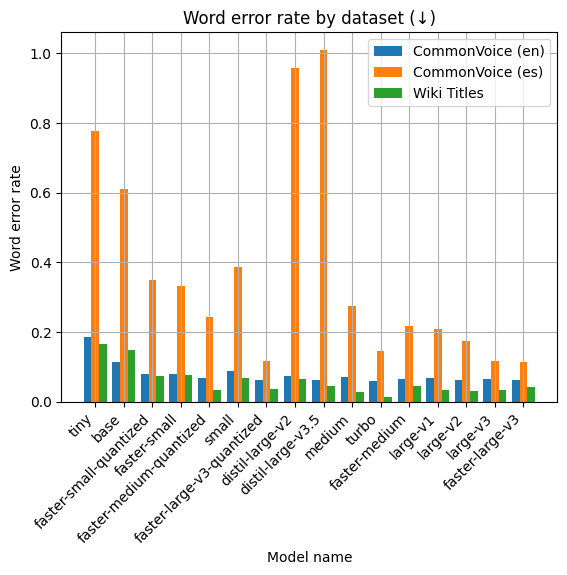

In [128]:
plt.figure(figsize=(10,4))

cats = df['model_name'].str.replace('distil-whisper/', '')
vals1, vals2, vals3 = df['en_results_wer'], df['es_results_wer'], df['wiki_results_wer']

# Bar width and x locations
w, x = 0.8, 3*np.arange(len(cats))

fig, ax = plt.subplots()
ax.bar(x - w, vals1, width=w, label='CommonVoice (en)')
ax.bar(x, vals2, width=w, label='CommonVoice (es)')
ax.bar(x + w, vals3, width=w, label='Wiki Titles')

ax.set_xticks(x)
ax.set_xticklabels(cats, rotation=45, ha='right')
ax.set_xlabel('Model name')
ax.set_ylabel('Word error rate')
ax.set_title('Word error rate by dataset (↓)')
ax.legend()

plt.grid()
plt.savefig('figs/wer_breakdown.pdf', dpi=300, bbox_inches='tight')

<Figure size 1000x400 with 0 Axes>

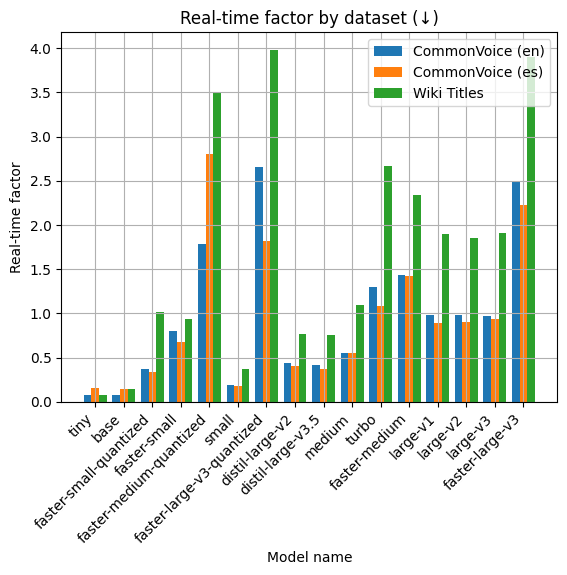

In [129]:
plt.figure(figsize=(10,4))

cats = df['model_name'].str.replace('distil-whisper/', '')
vals1, vals2, vals3 = df['en_results_rtf'], df['es_results_rtf'], df['wiki_results_rtf']

# Bar width and x locations
w, x = 0.8, 3*np.arange(len(cats))

fig, ax = plt.subplots()
ax.bar(x - w, vals1, width=w, label='CommonVoice (en)')
ax.bar(x, vals2, width=w, label='CommonVoice (es)')
ax.bar(x + w, vals3, width=w, label='Wiki Titles')

ax.set_xticks(x)
ax.set_xticklabels(cats, rotation=45, ha='right')
ax.set_xlabel('Model name')
ax.set_ylabel('Real-time factor')
ax.set_title('Real-time factor by dataset (↓)')
ax.legend()

plt.grid()
plt.savefig('figs/rtf_breakdown.pdf', dpi=300, bbox_inches='tight')

<Figure size 1000x400 with 0 Axes>

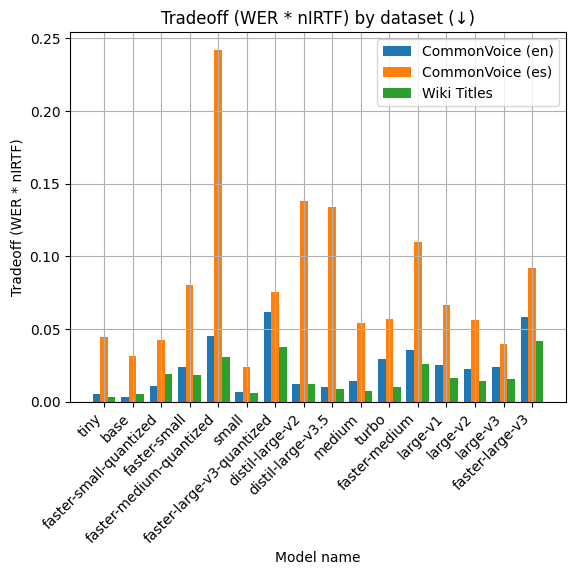

In [130]:
plt.figure(figsize=(10,4))

cats = df['model_name'].str.replace('distil-whisper/', '')
vals1, vals2, vals3 = df['en_results_tradeoff'], df['es_results_tradeoff'], df['wiki_results_tradeoff']

# Bar width and x locations
w, x = 0.8, 3*np.arange(len(cats))

fig, ax = plt.subplots()
ax.bar(x - w, vals1, width=w, label='CommonVoice (en)')
ax.bar(x, vals2, width=w, label='CommonVoice (es)')
ax.bar(x + w, vals3, width=w, label='Wiki Titles')

ax.set_xticks(x)
ax.set_xticklabels(cats, rotation=45, ha='right')
ax.set_xlabel('Model name')
ax.set_ylabel('Tradeoff (WER * nIRTF)')
ax.set_title('Tradeoff (WER * nIRTF) by dataset (↓)')
ax.legend()

plt.grid()
plt.savefig('figs/tradeoff_breakdown.pdf', dpi=300, bbox_inches='tight')

<Figure size 1000x400 with 0 Axes>

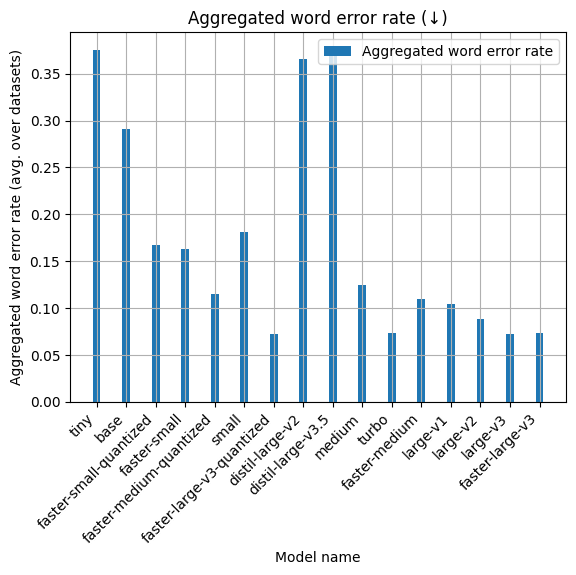

In [131]:
plt.figure(figsize=(10,4))

cats = df['model_name'].str.replace('distil-whisper/', '')
vals = df['agg_wer']

# Bar width and x locations
w, x = 0.8, 3*np.arange(len(cats))

fig, ax = plt.subplots()
ax.bar(x, vals, width=w, label='Aggregated word error rate')

ax.set_xticks(x)
ax.set_xticklabels(cats, rotation=45, ha='right')
ax.set_xlabel('Model name')
ax.set_ylabel('Aggregated word error rate (avg. over datasets)')
ax.set_title('Aggregated word error rate (↓)')
ax.legend()

plt.grid()
plt.savefig('figs/wer.pdf', dpi=300, bbox_inches='tight')

<Figure size 1000x400 with 0 Axes>

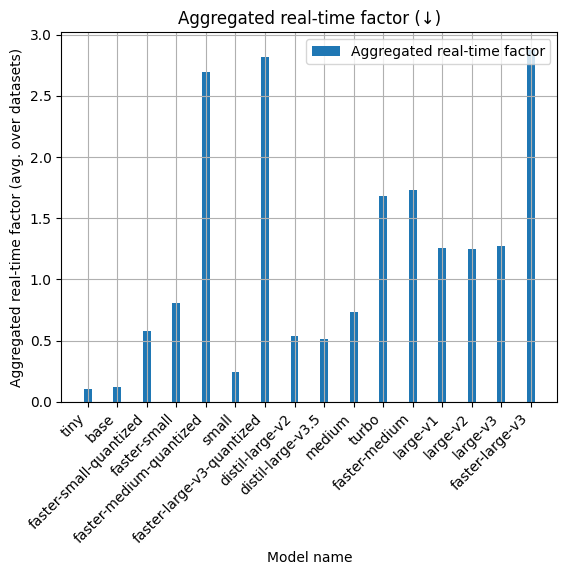

In [132]:
plt.figure(figsize=(10,4))

cats = df['model_name'].str.replace('distil-whisper/', '')
vals = df['agg_rtf']

# Bar width and x locations
w, x = 0.8, 3*np.arange(len(cats))

fig, ax = plt.subplots()
ax.bar(x, vals, width=w, label='Aggregated real-time factor')

ax.set_xticks(x)
ax.set_xticklabels(cats, rotation=45, ha='right')
ax.set_xlabel('Model name')
ax.set_ylabel('Aggregated real-time factor (avg. over datasets)')
ax.set_title('Aggregated real-time factor (↓)')
ax.legend()

plt.grid()
plt.savefig('figs/rtf.pdf', dpi=300, bbox_inches='tight')

<Figure size 1000x400 with 0 Axes>

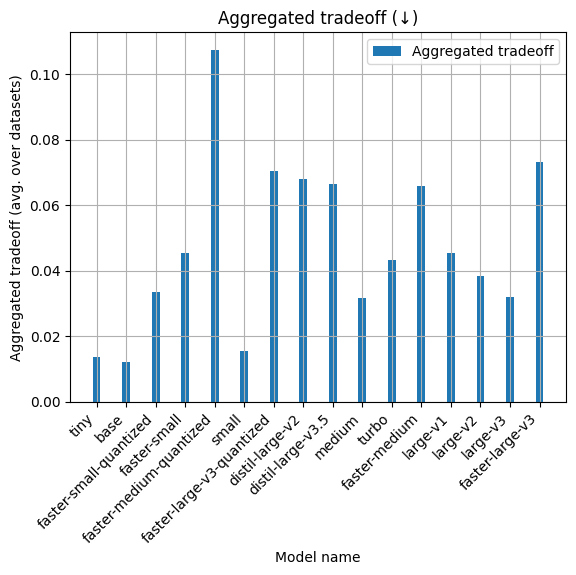

In [133]:
plt.figure(figsize=(10,4))

cats = df['model_name'].str.replace('distil-whisper/', '')
vals = df['agg_tradeoff']

# Bar width and x locations
w, x = 0.8, 3*np.arange(len(cats))

fig, ax = plt.subplots()
ax.bar(x, vals, width=w, label='Aggregated tradeoff')

ax.set_xticks(x)
ax.set_xticklabels(cats, rotation=45, ha='right')
ax.set_xlabel('Model name')
ax.set_ylabel('Aggregated tradeoff (avg. over datasets)')
ax.set_title('Aggregated tradeoff (↓)')
ax.legend()

plt.grid()
plt.savefig('figs/tradeoff.pdf', dpi=300, bbox_inches='tight')

<Figure size 1000x400 with 0 Axes>

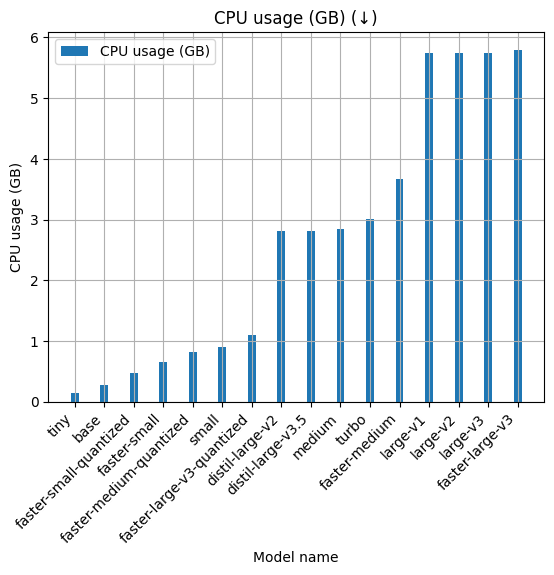

In [134]:
plt.figure(figsize=(10,4))

cats = df['model_name'].str.replace('distil-whisper/', '')
vals = df['cpu_mem_usage']

# Bar width and x locations
w, x = 0.8, 3*np.arange(len(cats))

fig, ax = plt.subplots()
ax.bar(x, vals, width=w, label='CPU usage (GB)')

ax.set_xticks(x)
ax.set_xticklabels(cats, rotation=45, ha='right')
ax.set_xlabel('Model name')
ax.set_ylabel('CPU usage (GB)')
ax.set_title('CPU usage (GB) (↓)')
ax.legend()

plt.grid()
plt.savefig('figs/usage.pdf', dpi=300, bbox_inches='tight')

In [135]:
table = df[['model_name', 'cpu_mem_usage']].sort_values(by=['cpu_mem_usage'])
table['model_name'] = table['model_name'].apply(lambda x: '\\texttt{' + x.replace('distil-whisper/', '') + '}')
table['cpu_mem_usage'] = table['cpu_mem_usage'].round(2).astype(str)
print(table.to_latex(index=False))

\begin{tabular}{ll}
\toprule
model_name & cpu_mem_usage \\
\midrule
\texttt{tiny} & 0.14 \\
\texttt{base} & 0.27 \\
\texttt{faster-small-quantized} & 0.47 \\
\texttt{faster-small} & 0.66 \\
\texttt{faster-medium-quantized} & 0.81 \\
\texttt{small} & 0.9 \\
\texttt{faster-large-v3-quantized} & 1.11 \\
\texttt{distil-large-v2} & 2.82 \\
\texttt{distil-large-v3.5} & 2.82 \\
\texttt{medium} & 2.84 \\
\texttt{turbo} & 3.01 \\
\texttt{faster-medium} & 3.66 \\
\texttt{large-v1} & 5.74 \\
\texttt{large-v2} & 5.74 \\
\texttt{large-v3} & 5.74 \\
\texttt{faster-large-v3} & 5.8 \\
\bottomrule
\end{tabular}



<Figure size 1000x400 with 0 Axes>

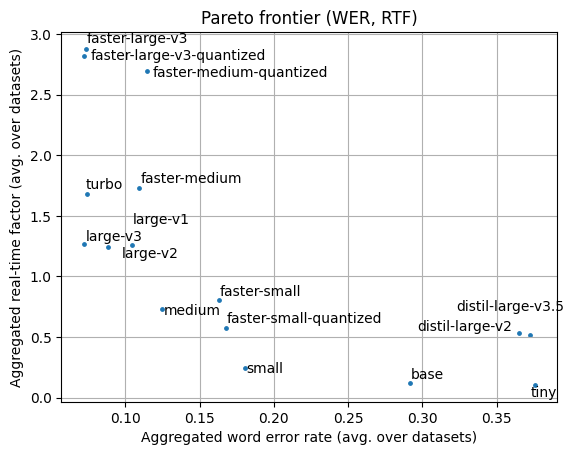

In [136]:
plt.figure(figsize=(10,4))

names = df['model_name'].str.replace('distil-whisper/', '')
x = df['agg_wer']
y = df['agg_rtf']

fig, ax = plt.subplots()
ax.scatter(x, y, s=6)

texts = [plt.text(x_i, y_i, s_i) for x_i, y_i, s_i in zip(x, y, names)]

ax.set_xlabel('Aggregated word error rate (avg. over datasets)')
ax.set_ylabel('Aggregated real-time factor (avg. over datasets)')
ax.set_title('Pareto frontier (WER, RTF)')
adjust_text(texts, x=x, y=y, autoalign='y',
            only_move={'points':'y', 'text':'y'}, force_points=0.15)

plt.grid()
plt.savefig('figs/pareto.pdf', dpi=300, bbox_inches='tight')

/var/folders/54/ctkh4lg97kd4x1fv3qzrpd3c0000gp/T/ipykernel_4323/515326478.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, s=6, c=c)
/var/folders/54/ctkh4lg97kd4x1fv3qzrpd3c0000gp/T/ipykernel_4323/515326478.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, s=6, c=c)
/var/folders/54/ctkh4lg97kd4x1fv3qzrpd3c0000gp/T/ipykernel_4323/515326478.py:9: UserWarning: *c* argument looks like a sin

<Figure size 1000x400 with 0 Axes>

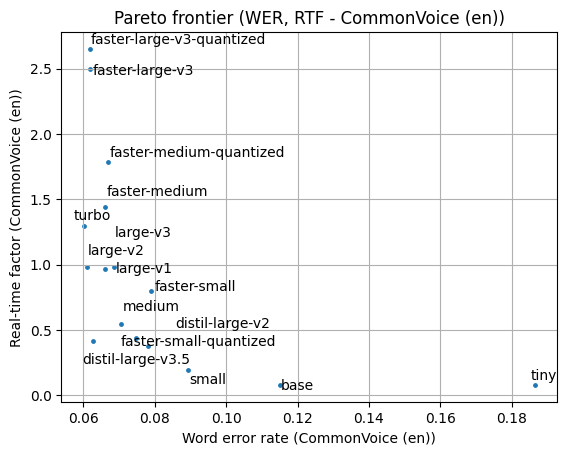

<Figure size 1000x400 with 0 Axes>

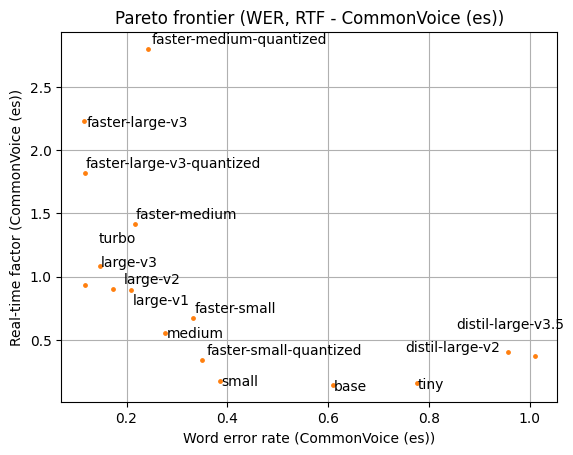

<Figure size 1000x400 with 0 Axes>

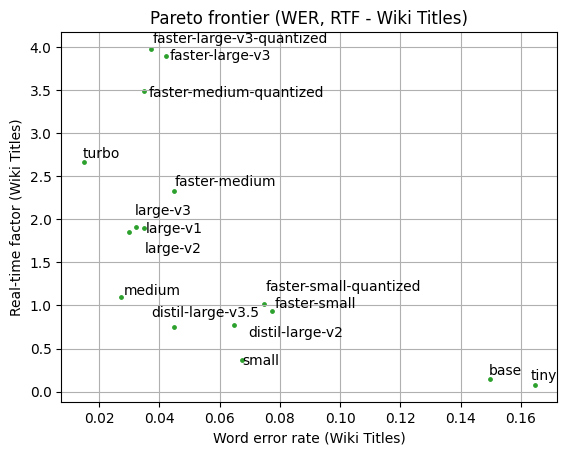

In [137]:
for ds, c, ds_name in zip(('en', 'es', 'wiki'), plt.cm.tab10([0, 1, 2]), ('CommonVoice (en)', 'CommonVoice (es)', 'Wiki Titles')):
    plt.figure(figsize=(10,4))

    names = df['model_name'].str.replace('distil-whisper/', '')
    x = df[f'{ds}_results_wer']
    y = df[f'{ds}_results_rtf']

    fig, ax = plt.subplots()
    ax.scatter(x, y, s=6, c=c)

    texts = [plt.text(x_i, y_i, s_i) for x_i, y_i, s_i in zip(x, y, names)]

    ax.set_xlabel(f'Word error rate ({ds_name})')
    ax.set_ylabel(f'Real-time factor ({ds_name})')
    ax.set_title(f'Pareto frontier (WER, RTF - {ds_name})')
    adjust_text(texts, x=x, y=y, autoalign='y',
                only_move={'points':'y', 'text':'y'}, force_points=0.15)

    plt.grid()
    plt.savefig(f'figs/{ds}_pareto.pdf', dpi=300, bbox_inches='tight')

In [138]:
df['pareto_distance'] = np.sqrt((df['agg_rtf'] / df['agg_rtf'].max())**2 + df['agg_wer']**2)

In [139]:
df[['model_name', 'pareto_distance']].sort_values(by=['pareto_distance'])

,model_name,pareto_distance
13,small,0.199982
7,faster-small-quantized,0.261273
12,medium,0.283321
0,base,0.294555
8,faster-small,0.323303
14,tiny,0.377422
1,distil-whisper/distil-large-v2,0.410153
2,distil-whisper/distil-large-v3.5,0.413222
10,large-v2,0.442158
11,large-v3,0.447506
